The variational principle states that the expectation value of the Hamiltonian for an arbitrary wave function satisfies

$$ \langle H \rangle = \frac{\langle \Psi \vert H \vert \Psi\rangle}{\langle \Psi \vert \Psi\rangle} = \frac{\int \Psi(\mathbf{r})^\ast H \Psi(\mathbf{r}) {\rm d}^3\mathbf{r} }{\int \Psi(\mathbf{r})^\ast \Psi(\mathbf{r}) {\rm d}^3\mathbf{r} } \geq E_0 $$

where $E_0$ is the exact ground state energy.


## <span style="color:#F6A800"> I. Variational solution of the harmonic oscillator </span>

We consider the Hamiltonian of the harmonic oscillator

$$ H = -\frac{\hbar^2}{2m} \frac{{\rm d}^2}{{\rm d}x^2} + \frac{1}{2}m\omega^2 x^2 $$

<br>



To apply the variational principle, we need a parametric form of the wave function. We postulate:

$$ \psi(x) = e^{-\alpha x^2} $$

with parameter $\alpha$.

We calculate the numerator and denominator of the variational principle

$$ \langle \Psi \vert \Psi\rangle = \int\limits_{-\infty}^\infty {\rm d}x e^{-2ax^2} = \sqrt{\frac{\pi}{2\alpha}} $$

$$ \langle \Psi \vert H \vert \Psi\rangle = \int\limits_{-\infty}^\infty {\rm d}x e^{-ax^2} \left[ -\frac{\hbar^2}{2m} \frac{{\rm d}^2}{{\rm d}x^2} + \frac{1}{2}m\omega^2 x^2 \right] e^{-ax^2} = \left( \frac{\alpha \hbar^2}{2m}+\frac{m\omega^2}{8\alpha} \right) \sqrt{\frac{\pi}{2\alpha}} $$

Hence, we obtain

$$ E(\alpha) = \frac{\alpha \hbar^2}{2m}+\frac{m\omega^2}{8\alpha} $$

In order to find the ground state energy $E_0$ according to the variational principle, we need to minimize this expression, _i.e._, find the parameter value $\alpha_{\rm min}$ for which $E(\alpha)$ is minimized.

<br>



Now we can calculate the ground state energy as $E_0=E(\alpha_{\rm min})$. 

<br>



$E_0$ is the eigenvalue to the normalized ground state wave function

$$ \psi(\alpha_{\rm min}) = \left( \frac{m\omega}{\pi \hbar} \right)^{\frac{1}{4}} e^{-\frac{m\omega }{2\hbar}x^2} $$

## <span style="color:#F6A800"> II. Variational calculation for the hydrogen atom </span>

We consider the H atom.

The Schrödinger equation reads:

$$ \left[ -\frac{1}{2}\nabla^2 - \frac{1}{r} \right] \psi(\mathbf{r}) = \varepsilon \psi(\mathbf{r}) $$

with electronic coordinates $\mathbf{r}$ and $r=\vert\mathbf{r}\vert$.

As basis functions in our variational approach, we use Gaussian functions centered at the nucleus (\textit{i.e.}, the origin):

$$ \chi_p (r)=e^{-\alpha_p r^2} $$

Our basis functions are not orthogonal. To solve the Schrödinger equation in matrix form, we solve the generalized eigenvalue problem 

$$ HC = ESC $$

with Hamiltonian $H=T+V$.

The corresponding Gaussian integrals (in atomic units) read

$$ S_{pq} = \int {\rm d}^3r e^{-\alpha_p r^2}e^{-\alpha_q r^2} = \left(\frac{\pi}{\alpha_p + \alpha_q}\right)^\frac{3}{2} $$

$$ T_{pq} = \langle\chi_p| -\frac{1}{2}{\nabla^2} |\chi_q\rangle  = -\frac{1}{2}\int {\rm d}^3r e^{-\alpha_p r^2} \nabla^2 e^{-\alpha_q r^2}
= 3\frac{\alpha_p\alpha_q\pi^\frac{3}{2}}{(\alpha_p + \alpha_q)^\frac{5}{2}} $$

$$ V_{pq} = \langle\chi_p| - \frac{1}{r} |\chi_q\rangle  =  -{1}\int {\rm d}^3r e^{-\alpha_p r^2} \frac{1}{r} e^{-\alpha_q r^2} 
= -\frac{2\pi}{\alpha_p + \alpha_q} $$

Below is a simple implementation of the variational principle for the hydrogen atom.

In [1]:
import sys
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import integrate
from scipy.special import erf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
def variational_H_alpha(alpha,nMax):
    try:
        N = len(alpha)
    except:
        N=1
        alpha = [alpha]
    H=np.zeros((N, N))
    S=np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            a = alpha[i]+alpha[j]
            S[i,j] = (np.pi/a)**1.5
            H[i,j] = 2*S[i,j]*3.0*alpha[i]*alpha[j]/a - 2*1*2*np.pi/a
    #print("S matrix:", S)
    #print("H matrix:", H)
    alpha, beta, vl, C, work, info = sp.linalg.lapack.zggev(H, S) # zggev is the function to perform the generalized eigenvalue problem
    E=(alpha/beta).real
    L=list(range(N))
    def sortFunction(index):
        return E[index]
    L.sort(key=sortFunction) # # sort a index array by the corrisponding E[index] value

    def eigenfunction(x, index):
        y=0
        for i in range(N):
            y+=(C[:,index][i].real)*np.e**(-alpha[i]*x**2) # C[:, j] is the array of the coefficients (eigenvector)
        return y
    def radialProbability(x, index):
        return x**2*eigenfunction(x, index)**2
    index=0
    for j in L[0:nMax]:
        index+=1
        def toeV(E):
            return 27.211386245988*E/2 # Ry to eV
        print("Energy eigenvalue n=%d : %.8f Ry (%.8f eV)  ...  expected : %.8f Ry (%.8f eV)" % (index, E[j], toeV(E[j]), -1/(index**2), toeV(-1/(index**2))))

### <span style="color:#F6A800"> II.1. Optimizing one basis function </span>

Let's first consider only one $\alpha$ parameter, hence only one basis function:

$$ \chi (r)=e^{-\alpha r^2} $$

In [ ]:
Rnl = widgets.interactive(variational_H_alpha, nMax=widgets.fixed(1),\
                          alpha=widgets.FloatSlider(min=0.1, max=0.5, step=0.05, value=0.1, description=r"$\alpha$"), \
                          )
display(Rnl)               

### <span style="color:#F6A800"> II.2. Using preoptimized parameters </span>

Next, we use preoptimized $\alpha$ parameters for atomic hydrogen and five basis functions:

In [4]:
alpha = [0.121949, 0.444529, 1.962079, 13.00773]

In [5]:
variational_H_alpha(alpha,nMax=1)

Energy eigenvalue n=1 : -0.99855681 Ry (-13.58605754 eV)  ...  expected : -1.00000000 Ry (-13.60569312 eV)


In [6]:
variational_H_alpha(alpha,nMax=4)

Energy eigenvalue n=1 : -0.99855681 Ry (-13.58605754 eV)  ...  expected : -1.00000000 Ry (-13.60569312 eV)
Energy eigenvalue n=2 : 0.22642692 Ry (3.08069524 eV)  ...  expected : -0.25000000 Ry (-3.40142328 eV)
Energy eigenvalue n=3 : 5.18459763 Ry (70.54004431 eV)  ...  expected : -0.11111111 Ry (-1.51174368 eV)
Energy eigenvalue n=4 : 42.28872908 Ry (575.36747044 eV)  ...  expected : -0.06250000 Ry (-0.85035582 eV)


### <span style="color:#F6A800"> II.3. Solving the problem without preoptimized parameters </span>

Finally, let's apply the variational method without preoptimized parameters and with a large number of basis functions (here, we use 40).

In [7]:
def variational_H(N,nMax):
    plt.figure(dpi=300)
    radiusMax=40
    I=[0.001 * (1000000)**(i/N) for i in range(N)]  # I runs from 0.001 to 1000 (geometric progression) 
    H=np.zeros((N, N))
    S=np.zeros((N, N)) # H (hamiltonian) and S (overlap) are just two square matrices (I initialized them with zero, but this value is overwritten in the following loop)

    for i in range(N):
            for j in range(N):
                    H[i][j]=0.5*6*I[i]*I[j]*(np.pi/(I[i]+I[j]))**1.5/(I[i]+I[j])-2*np.pi/(I[i]+I[j])
                    S[i][j]=(np.pi/(I[i]+I[j]))**1.5

    alpha, beta, vl, C, work, info = sp.linalg.lapack.zggev(H, S) # zggev is the function to perform the generalized eigenvalue problem
    E=(alpha/beta).real #the eigenvalues are actually real, but i casted them in real to avoid tedious warnings
    L=list(range(N))
    def sortFunction(index):
        return E[index]
    L.sort(key=sortFunction) # # sort a index array by the corrisponding E[index] value

    def eigenfunction(x, index):
        y=0
        for i in range(N):
            y+=(C[:,index][i].real)*np.e**(-I[i]*x**2) # C[:, j] is the array of the coefficients (eigenvector)
        return y
    def radialProbability(x, index):
        return x**2*eigenfunction(x, index)**2
    index=0
    for j in L[0:nMax]:
        index+=1
        def toeV(E):
            return 27.211386245988*E
        print("Energy eigenvalue n=%d : %.8f (%.8f eV)  ...  expected : %.8f (%.8f eV)" % (index, E[j], toeV(E[j]), -0.5/(index**2), toeV(-0.5/(index**2))))
        xvalues = np.linspace(0, radiusMax, 1000)
        yvalues = []
        II, err=sp.integrate.quad(radialProbability, 0, np.inf, j)# II is the normalization constant (quad is the function to compute a definite integral)
        for x in xvalues:
            y=radialProbability(x, j)/II
            yvalues.append(y)
        plt.plot(xvalues, yvalues)
    bottom, top = plt.ylim()
    plt.xlim(0, radiusMax)
    plt.ylim(0, top)
    plt.xlabel('r ($a_0$)')
    plt.ylabel('radial probability $r^2 [R(r)]^2$')
    plt.show()

The output of the next cell shows the first six energy eigenvalues of the s states and a plot of the radial probability densities as obtained from the corresponding eigenfunctions.

Energy eigenvalue n=1 : -0.49999947 (-13.60567869 eV)  ...  expected : -0.50000000 (-13.60569312 eV)
Energy eigenvalue n=2 : -0.12499993 (-3.40142148 eV)  ...  expected : -0.12500000 (-3.40142328 eV)
Energy eigenvalue n=3 : -0.05555554 (-1.51174315 eV)  ...  expected : -0.05555556 (-1.51174368 eV)
Energy eigenvalue n=4 : -0.03124999 (-0.85035559 eV)  ...  expected : -0.03125000 (-0.85035582 eV)
Energy eigenvalue n=5 : -0.01999984 (-0.54422345 eV)  ...  expected : -0.02000000 (-0.54422772 eV)
Energy eigenvalue n=6 : -0.01375714 (-0.37435090 eV)  ...  expected : -0.01388889 (-0.37793592 eV)


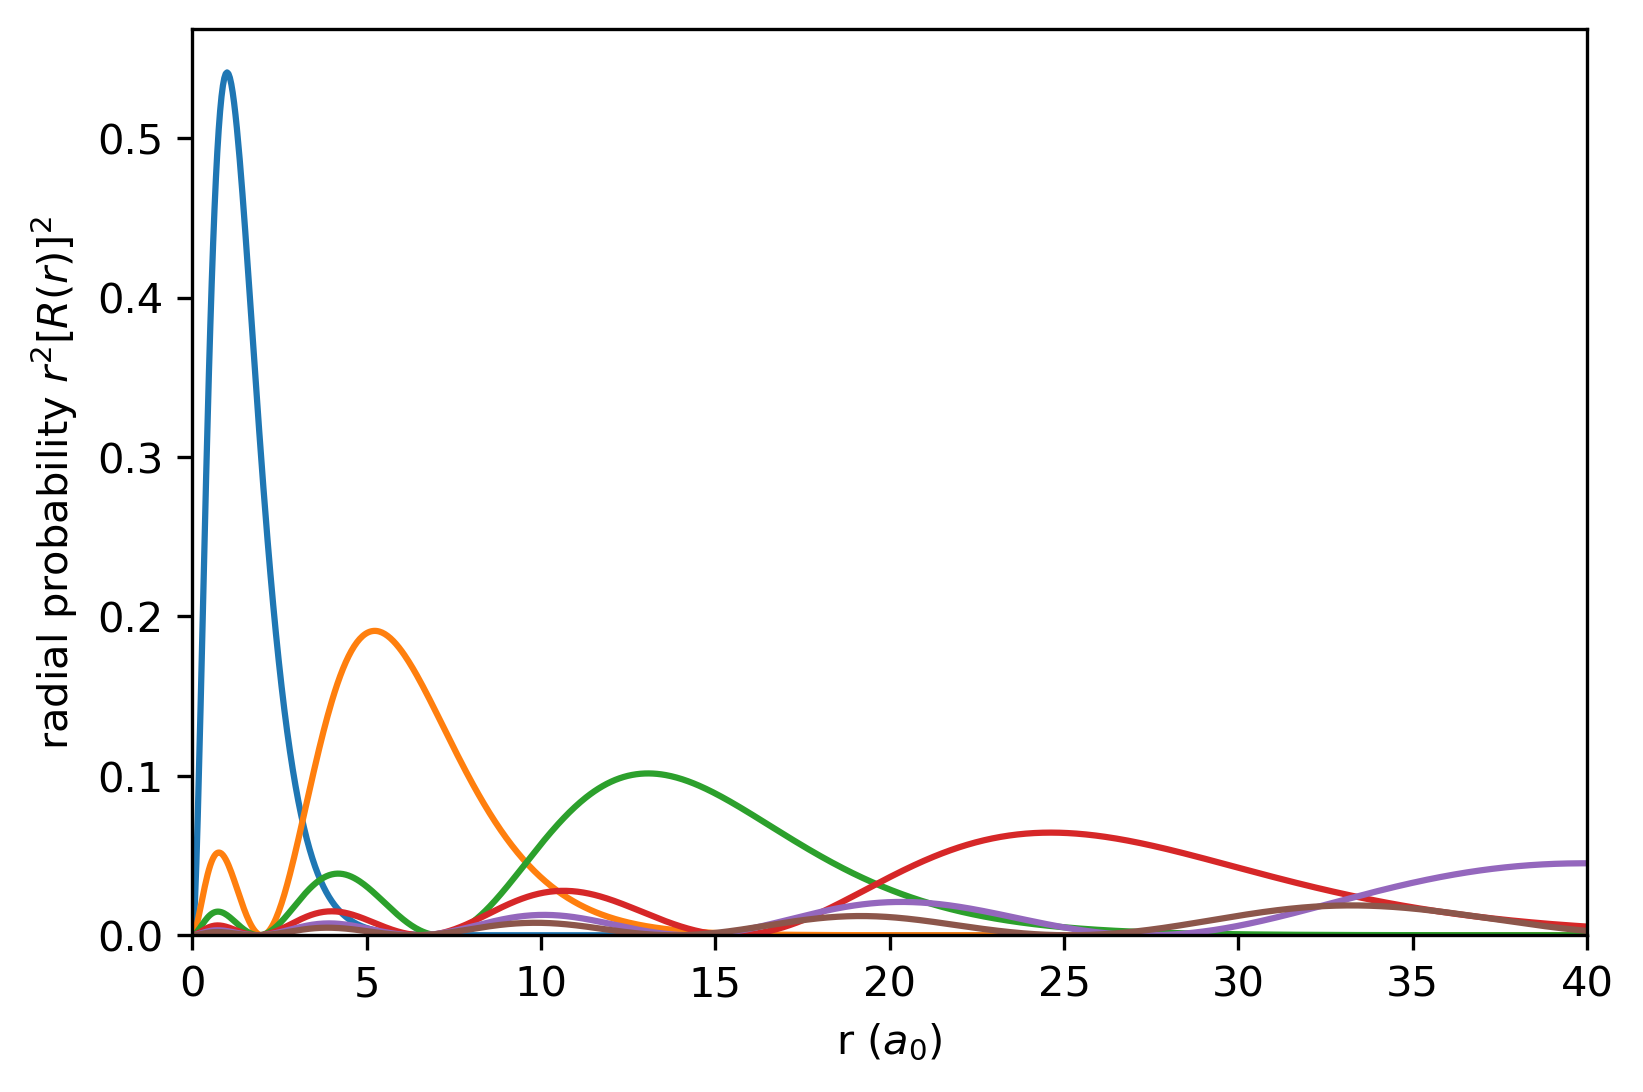

In [8]:
variational_H(N=40,nMax=6)